In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests

header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 15_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'}
url = 'https://charlottesville.craigslist.org/search/fua#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

In [17]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")

In [28]:
# Scraping
import re
import numpy as np

furniture_types = ["sofa", "couch", "table", "chair", "bed", "dresser", "cabinet", "shelf", "lamp", "desk",
                   "stool", "nightstand", "recliner", "bookshelf", "mirror", "armchair", "ottoman", "bench",
                   "sideboard", "hutch", "wardrobe", "entertainment center", "rocking chair", "barstool"]
conditions = ["new", "used", "vintage", "antique", "refurbished", "like new"]
materials = ["wood", "metal", "leather", "glass", "plastic", "fabric"]

data = []

for k in range(len(listings)):
    title = listings[k].find('div', class_='title').get_text().lower()
    price = listings[k].find('div', class_='price').get_text()
    link = listings[k].find(href=True)['href']

    words = title.split()
    hits = [word for word in words if word in furniture_types]

    if len(hits) == 0:
        furniture_type = 'missing'
    else:
        furniture_type = hits[0]

    condition = next((word for word in words if word in conditions), "unknown")

    material = next((word for word in words if word in materials), "unknown")

    data.append({
        'title': title,
        'price': price,
        'furniture type': furniture_type,
        'condition': condition,
        'material': material,
        'link': link
    })

In [27]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
print(df.shape)
df.to_csv('craigslist_cville_furniture.csv')
df.head()

(356, 6)


,title,price,furniture type,condition,material,link
0,wood side table,40,table,unknown,wood,https://charlottesville.craigslist.org/fuo/d/c...
1,walker-edison loft bed,200,bed,unknown,unknown,https://charlottesville.craigslist.org/fuo/d/c...
2,vintage stubby shelf.,1100,missing,vintage,unknown,https://charlottesville.craigslist.org/fuo/d/f...
3,blackout solid wood dresser,397,dresser,unknown,wood,https://charlottesville.craigslist.org/fuo/d/f...
4,2 hutches in excellent,100,missing,unknown,unknown,https://charlottesville.craigslist.org/fuo/d/s...


In [35]:
# Price by brand:
df.loc[:,['price','furniture type']].groupby('furniture type').describe()

price                                                        \
                count        mean         std    min     25%    50%     75%   
furniture type                                                                
armchair          2.0  400.000000  424.264069  100.0  250.00  400.0  550.00   
barstool          1.0  100.000000         NaN  100.0  100.00  100.0  100.00   
bed              11.0  422.272727  743.032178   10.0   85.00  125.0  275.00   
cabinet          15.0  114.800000  112.731159    1.0   17.50   85.0  175.00   
chair            19.0  101.315789  119.056967   10.0   20.00   50.0  150.00   
couch             3.0  300.000000  264.575131  100.0  150.00  200.0  400.00   
desk             16.0  121.750000  132.904226   10.0   38.75   75.0  131.25   
dresser           4.0  191.750000  169.496067    0.0   93.75  185.0  283.00   
hutch             3.0  186.000000   57.419509  139.0  154.00  169.0  209.50   
lamp             12.0   33.083333   19.256443    5.0   18.75   30.0   46.75   
mirror            8.0   56.875000   29.992559   20.0   37.50   50.0   73.75   
missing         173.0  155.751445  267.474236    0.0   30.00   75.0  175.00   
ottoman           5.0   42.000000   33.466401   20.0   20.00   30.0   40.00   
recliner          2.0  245.000000  289.913780   40.0  142.50  245.0  347.50   
shelf             3.0   53.000000   24.637370   30.0   40.00   50.0   64.50   
sofa             14.0  440.000000  381.555521   40.0  155.00  275.0  687.50   
stool             7.0   90.714286  149.622541   10.0   15.00   30.0   70.00   
table            58.0  208.724138  488.087992   10.0   40.50   75.0  156.75   

                        
                   max  
furniture type          
armchair         700.0  
barstool         100.0  
bed             2500.0  
cabinet          300.0  
chair            400.0  
couch            600.0  
desk             450.0  
dresser          397.0  
hutch            250.0  
lamp              65.0  
mirror           100.0  
missing         2500.0  
ottoman          100.0  
recliner         450.0  
shelf             79.0  
sofa            1300.0  
stool            425.0  
table           2800.0

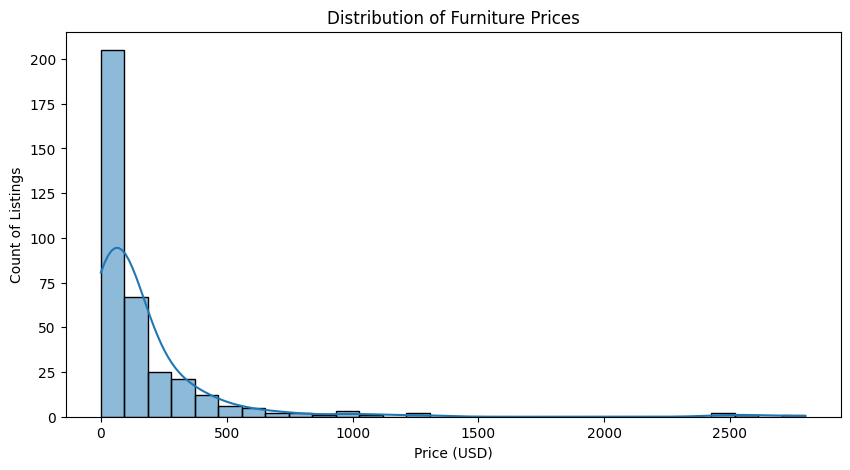

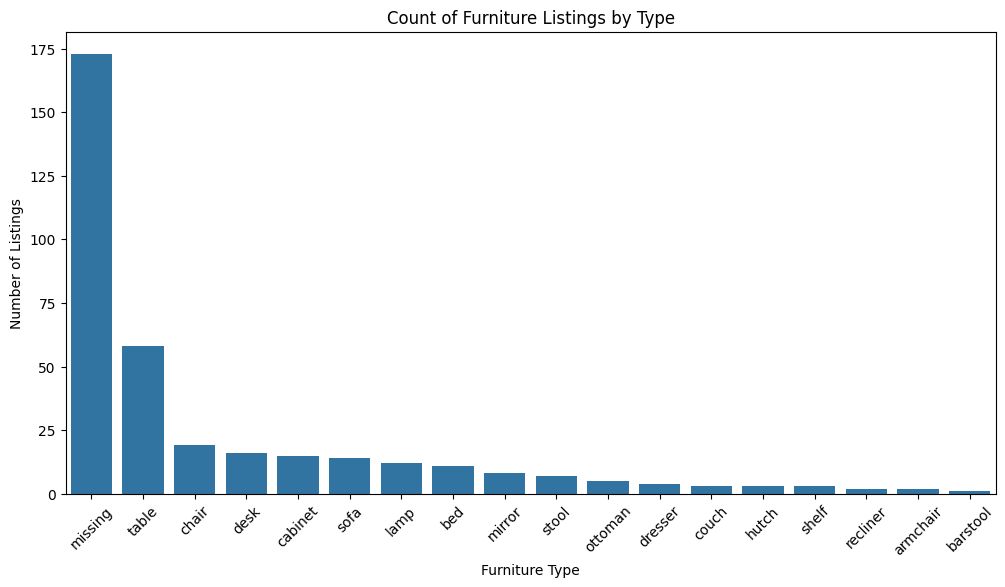

In [42]:
# Price distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(df["price"].dropna(), bins=30, kde=True)
plt.xlabel("Price (USD)")
plt.ylabel("Count of Listings")
plt.title("Distribution of Furniture Prices")
plt.show()

# Furniture type distribution
furniture_counts = df["furniture type"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=furniture_counts.index, y=furniture_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Furniture Type")
plt.ylabel("Number of Listings")
plt.title("Count of Furniture Listings by Type")
plt.show()
